**1. Importing the dependencies**

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle


**2. Data Loading and Understanding**

In [200]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [201]:
df.shape

(7043, 21)

In [202]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [203]:
## To display all coulumns of the dataframe

pd.set_option("display.max_columns", None)

In [204]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [206]:
df = df.drop(columns=['customerID'])
#Column customerID is not required for modelling

In [207]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [208]:
num_fetures = ['tenure','TotalCharges','MonthlyCharges']

In [209]:
# Unique values in each column
for col in df.columns:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------

In [210]:
##Total charges is in string format, need to convert it to float

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [211]:
#df['TotalCharges'] = df['TotalCharges'].astype(float)

#ValueError: could not convert string to float: ' '
## ' ' in ToatlCharges column is causing error. 

In [212]:
#Filtering dataframe to see ' ' 

df[df["TotalCharges"] == ' ']

##Here for all ' ' in TotalCharges, value of tenure is 0. 
#Which makes sense. So we cant drop these value. Need to impute them

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [213]:
##Replacing ' ' with "0.0"

df['TotalCharges'] = df['TotalCharges'].replace({" " : "0.0"})


In [214]:
##Now changing data type of TotalCharges to float 

df["TotalCharges"] = df["TotalCharges"].astype(float)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [216]:
## The class distribution of target column

print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**Insights:**<br>
1. Customer ID removed as it is not required for modelling
2. No missing values in the dataset
3. Missing values in TotalCharges column were imputed with 0.0 and data type changed from string to float
4. Class imbalance identified in the target

**3.EDA(Exploratory Data Analysis)**

In [217]:
df.shape

(7043, 20)

In [218]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [219]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**Numerical Features Analysis**

In [220]:
#Understanding distribution of numerical features

def plot_histogram(df, column_name):
    plt.figure(figsize=(6,4))
    sns.histplot(df[column_name],kde=True)
    plt.title(f'Distribution of {column_name}')
    ##Mean and median of the column
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    ##Adding vertical lines at mean and median
    plt.axvline(col_mean, color='red', linestyle="--", label="Mean")
    plt.axvline(col_median, color='green', linestyle="-", label='Median')

    plt.legend()
    plt.show()

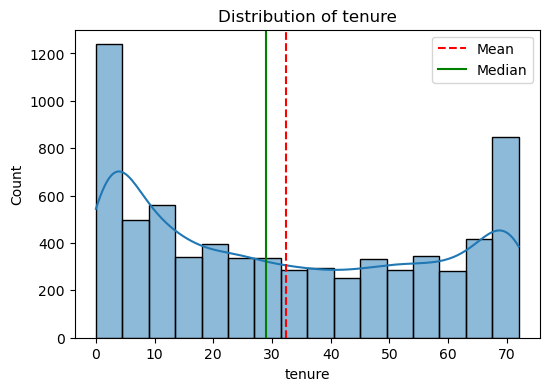

In [221]:
plot_histogram(df, "tenure")

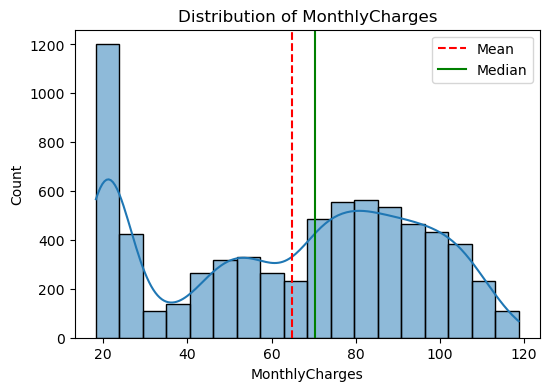

In [222]:
plot_histogram(df, "MonthlyCharges")

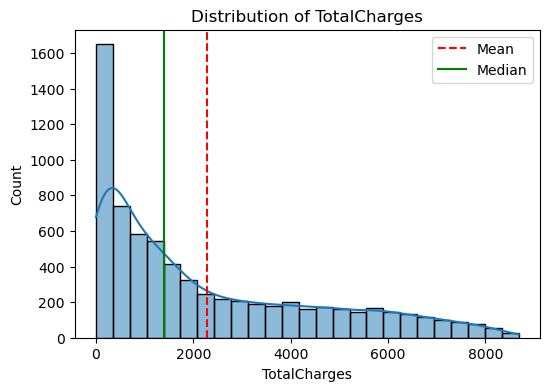

In [223]:
plot_histogram(df, "TotalCharges")

Feature Scaling:

**StandardScaler** - is required for linear models like lofistic regression, SVC or KNN. <br>
Here, with tree based model we do not need to use scaling.

**Box plot for numerical features**

In [224]:
def box_plot(df, column_name):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[column_name])
    plt.title(f'Distribution of {column_name}')
    plt.ylabel(column_name)
    plt.show()

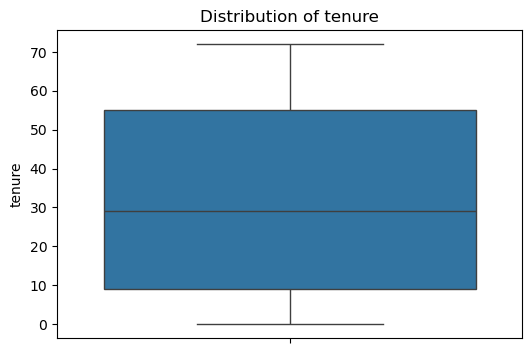

In [225]:
box_plot(df, "tenure")

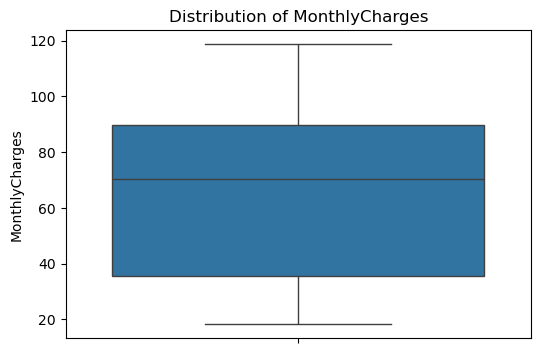

In [226]:
box_plot(df, "MonthlyCharges") 	

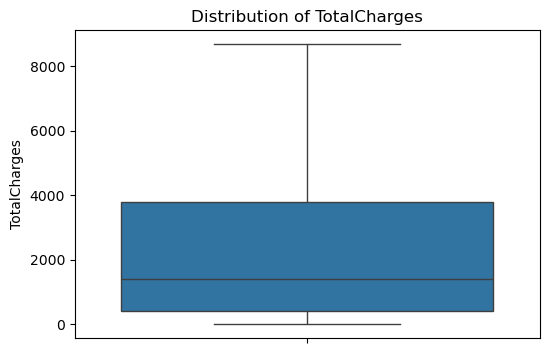

In [227]:
box_plot(df, "TotalCharges")

**Correlation Heatmap for numerical features**

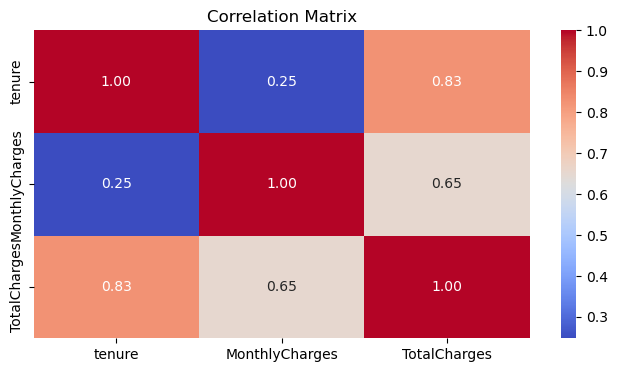

In [228]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), 
            annot=True, cmap="coolwarm", fmt=".2f" )

plt.title("Correlation Matrix")
plt.show()

##TotalCharges and tenure has correlations more than 0.8, 
# this can cause Multicollinearity issue, so we have to drop one of those 

In [229]:
object_cols = df.select_dtypes(include='object').columns.to_list()
object_cols = ['SeniorCitizen'] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

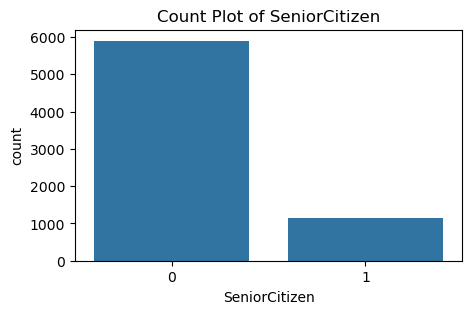

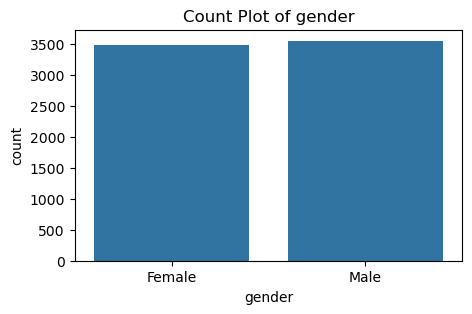

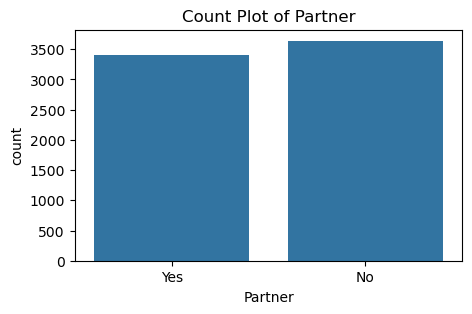

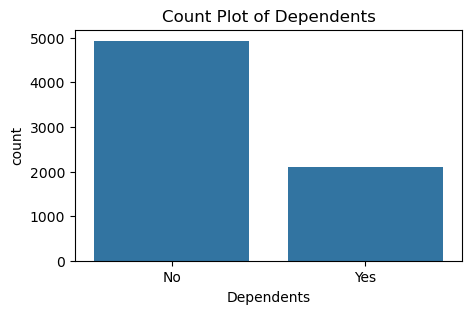

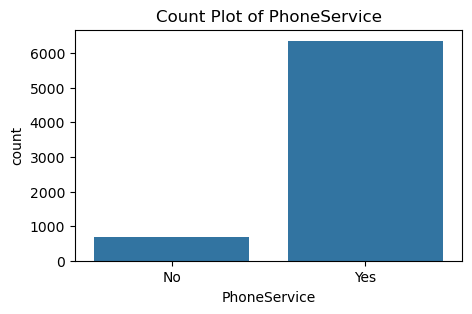

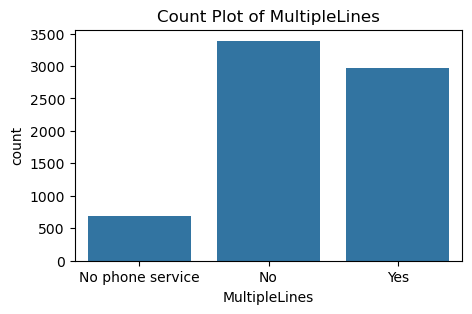

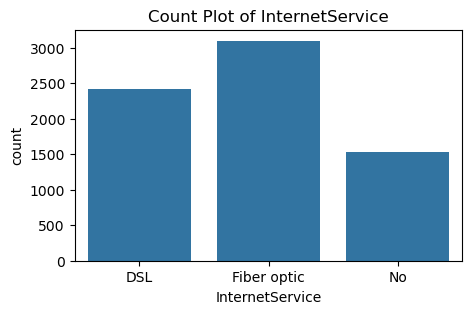

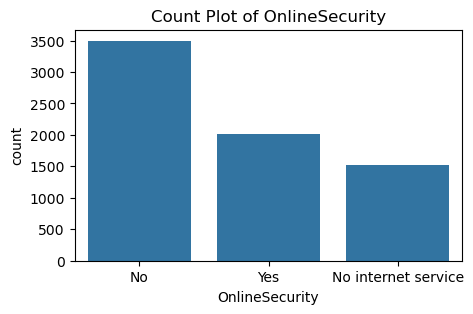

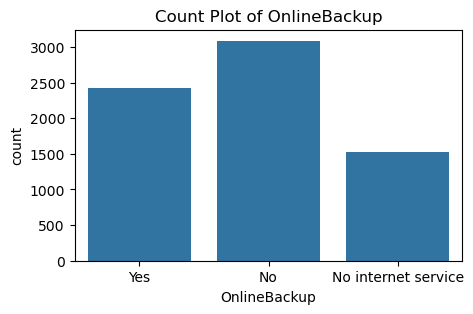

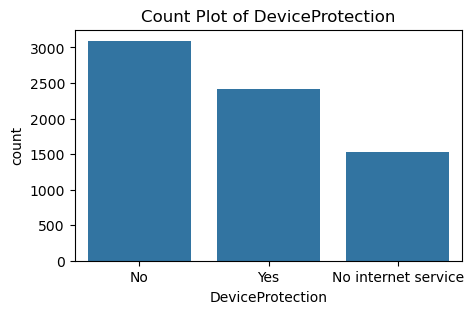

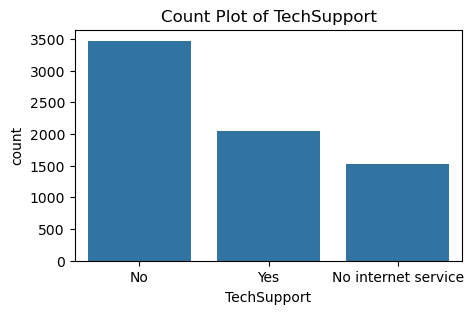

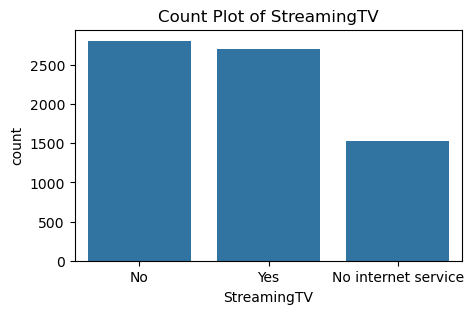

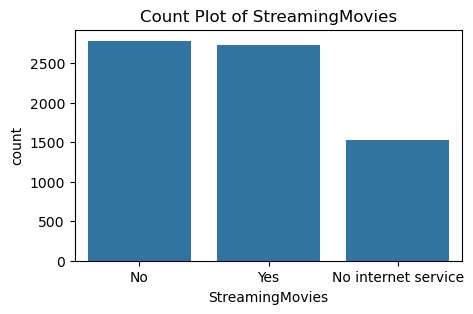

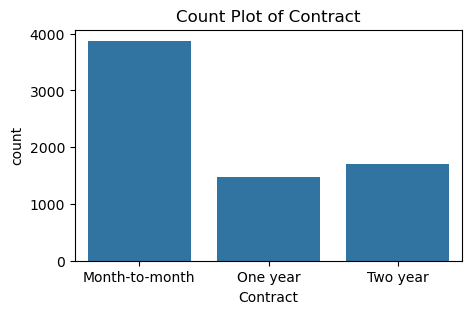

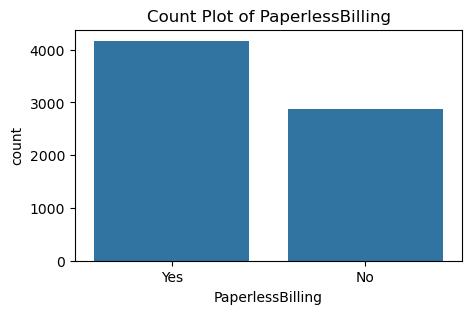

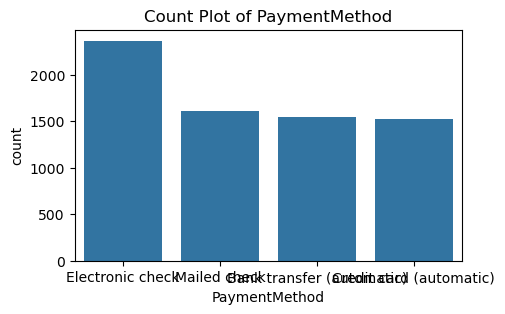

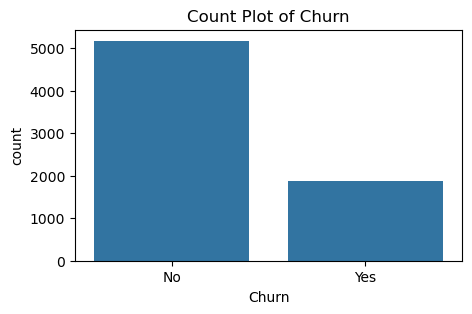

In [230]:
for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f'Count Plot of {col}')
    plt.show()

#Countplot form sns, used to display the number of observations for each category in categorical variable

**4. Data Preprocessing**

In [231]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Label Encoding for target column

In [232]:
df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})

/var/folders/cl/4cx5dzfd00n7stshvmv3sqmc0000gn/T/ipykernel_1839/3085587267.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1, "No":0})


In [233]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [234]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label Encoding for categorical features

In [235]:
## Identifying columns with object as data types

object_columns = df.select_dtypes(include='object').columns

In [236]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [237]:
## initialize a dict to store the encoders

encoders = {}

#Apply label encoding and store encoders 

for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

#save the encoders to a pickle file
with open('encoders.pkl', "wb") as f:
    pickle.dump(encoders, f)

In [238]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

Using label Encoder here - though it is used for ordinal coding, <br>
The model we are using here is tree based thats - XGBoost and Random Forest. <br>
So label encoder works well here. <br>
But for liner models - model will get confused cuz of the fake ordering. <br>

One Hot Encoding we can use but that it cause curse of dimentionality. 

For linear model - also need to apply scaling to numerical features.

In [239]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Train and test split data**

In [240]:
#Split the features and 
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [241]:
print(X.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [242]:
X_train,X_test,y_train, y_test = train_test_split(X,y,
                                                  random_state=42, test_size=0.2)

In [243]:
print(y_train.shape)

(5634,)


In [244]:
print(y_train.value_counts())
#We need even distribution of of all classes i.e 0 and 1

Churn
0    4138
1    1496
Name: count, dtype: int64


Imbalance in the classes, hence performing oversampling or upsampling with SMOTE <br>
SMOTE: Synthetic Minority Oversampling Technique

In [245]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#Smote is for train split only

In [246]:
print(y_train_smote.shape)
print("**"*20)
print(y_train_smote.value_counts())

(8276,)
****************************************
Churn
0    4138
1    4138
Name: count, dtype: int64


**5.Model Training**

In [247]:
dt_params = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}


In [248]:
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}

In [249]:
xgb_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2]
}

In [250]:
models = { 
    "Decision Tree": (DecisionTreeClassifier(random_state=42), dt_params), 
    "Random Forest": (RandomForestClassifier(random_state=42), rf_params), 
    "XGBoost" : (XGBClassifier(random_state=42, use_label_encoder=False,
                              eval_metric='logloss'), xgb_params)
}

/opt/homebrew/Caskroom/miniconda/base/envs/pro1_churn/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [251]:
#Dictionary to store the cross validation results

best_models = {}
cv_scores = {}

#Perform 5-fold cross validation for each model

for model_name, (model, params) in models.items():
    print(f" Tuning {model_name} ")

    search = RandomizedSearchCV(
        estimator = model,
        param_distributions = params,
        n_iter = 20,
        cv=5,
        scoring = "accuracy",
        n_jobs = -1,
        random_state = 42
    )

    search.fit(X_train_smote,y_train_smote)

    best_models[model_name] = search.best_estimator_
    cv_scores[model_name] = search.best_score_

    print(f"Best CV Accuracy: {search.best_score_:.4f}")
    print(f"Best Parameters: {search.best_params_}")
    print("**" * 30)

 Tuning Decision Tree 
Best CV Accuracy: 0.8076
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}
************************************************************
 Tuning Random Forest 
Best CV Accuracy: 0.8424
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 20}
************************************************************
 Tuning XGBoost 


/opt/homebrew/Caskroom/miniconda/base/envs/pro1_churn/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/homebrew/Caskroom/miniconda/base/envs/pro1_churn/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best CV Accuracy: 0.8377
Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2}
************************************************************


In [252]:
cv_scores

{'Decision Tree': 0.8076462045915612,
 'Random Forest': 0.8424486623757609,
 'XGBoost': 0.8377391012449464}

Random Forest gave highest accuracy.

**Model Evaluation**

In [253]:
##Best model : 

rfc = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    min_samples_split=2,
    max_features='log2',
    max_depth=20
)

rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, max_features='log2', random_state=42)

In [254]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [255]:
#Evaluating on test data 

y_test_pred = rfc.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_test_pred)}")
print(f"Classification Report: {classification_report(y_test, y_test_pred)}")

Accuracy Score: 0.7821149751596878
Confusion Matrix: [[874 162]
 [145 228]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1036
           1       0.58      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409



In [256]:
#To save the trained model as pickle file

model_data = {"model":rfc, "feature_names": X.columns.tolist()}

with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data,f)

**7. Load the saved model and build Predictive System**

In [257]:
#Load the saved model and feature names 

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["feature_names"]

In [258]:
print(loaded_model)

RandomForestClassifier(max_depth=20, max_features='log2', random_state=42)


In [259]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [260]:
input_data = {
    "gender": "Female",
    "SeniorCitizen": 0,
    "Partner": "Yes",
    "Dependents": "No",
    "tenure": 1,
    "PhoneService": "No",
    "MultipleLines": "No phone service",
    "InternetService": "DSL",
    "OnlineSecurity": "No",
    "OnlineBackup": "Yes",
    "DeviceProtection": "No",
    "TechSupport": "No",
    "StreamingTV": "No",
    "StreamingMovies": "No",
    "Contract": "Month-to-month",
    "PaperlessBilling": "Yes",
    "PaymentMethod": "Electronic check",
    "MonthlyCharges": 29.85,
    "TotalCharges": 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

print(input_data_df)

#Encode Categorical features using the saved encoders

for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[column])

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes  Electronic check           29.85         29.85  


In [261]:
input_data_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85


In [262]:
#Make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

#results

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediction Probablity: {pred_prob}")

[0]
Prediction: No Churn
Prediction Probablity: [[0.77 0.23]]
